In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
url = 'https://raw.githubusercontent.com/marioraulgz/SpotifyBEDU-LaRevancha/main/Postworks/Datasets/data_delimited.csv'
df = pd.read_csv(url,index_col=0)

In [ ]:
iqr = df['track.popularity'].quantile(0.75) - df['track.popularity'].quantile(0.25)
filtro_inferior = df['track.popularity'] > df['track.popularity'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['track.popularity'] < df['track.popularity'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]

In [ ]:
df_filtrado.head()

,added_at,is_local,added_by.type,track.album.album_type,track.album.id,track.album.name,track.album.release_date,track.album.release_date_precision,track.album.total_tracks,track.album.type,track.disc_number,track.duration_ms,track.episode,track.explicit,track.external_ids.isrc,track.is_local,track.name,track.popularity,track.track,track.track_number,track.type,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,2020-12-01T05:02:00Z,False,user,album,4yP0hdKOZPNshxUOjY0cZj,After Hours,2020-03-20,day,14,album,1,200040,False,False,USUG11904206,False,Blinding Lights,96,True,9,track,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0VjIjW4GlUZAMYd2vXMi3b,4
1,2020-12-01T05:02:00Z,False,user,single,31IDBea3eEs57a0joX6TjN,Dance Monkey,2019-05-10,day,1,album,1,209754,False,False,QZES71982312,False,Dance Monkey,68,True,1,track,0.825,0.593,6,-6.401,0,0.0988,0.68800,0.000161,0.1700,0.540,98.078,1rgnBhdG2JDFTbYkYRZAku,4
2,2020-12-01T05:02:00Z,False,user,album,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,day,16,album,1,196652,False,True,USAT21906978,False,The Box,87,True,2,track,0.896,0.586,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,0nbXyq5TXYPCO7pr3N8S4I,4
3,2020-12-01T05:02:00Z,False,user,single,6XcYTEonLIpg9NpAbJnqrC,Roses (Imanbek Remix),2019-09-13,day,1,album,1,176218,False,True,RUB421901499,False,Roses - Imanbek Remix,66,True,1,track,0.785,0.721,8,-5.457,1,0.0506,0.01490,0.004320,0.2850,0.894,121.962,2Wo6QQD1KMDWeFkkjLqwx5,4
4,2020-12-01T05:02:00Z,False,user,album,7fJJK56U9fHixgO0HQkhtI,Future Nostalgia,2020-03-27,day,11,album,1,183290,False,False,GBAHT1901121,False,Don't Start Now,83,True,2,track,0.793,0.793,11,-4.521,0,0.0830,0.01230,0.000000,0.0951,0.679,123.950,3PfIrDoz19wz7qK7tYeu62,4


In [ ]:
variables_num = df_filtrado[["track.popularity", "loudness",'danceability', 'energy','speechiness','acousticness','instrumentalness','liveness','valence','tempo','track.duration_ms']]

In [ ]:
variables_num.isnull().values.any()

False

In [ ]:
variables_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907 entries, 0 to 2049
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track.popularity   1907 non-null   int64  
 1   loudness           1907 non-null   float64
 2   danceability       1907 non-null   float64
 3   energy             1907 non-null   float64
 4   speechiness        1907 non-null   float64
 5   acousticness       1907 non-null   float64
 6   instrumentalness   1907 non-null   float64
 7   liveness           1907 non-null   float64
 8   valence            1907 non-null   float64
 9   tempo              1907 non-null   float64
 10  track.duration_ms  1907 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 178.8 KB


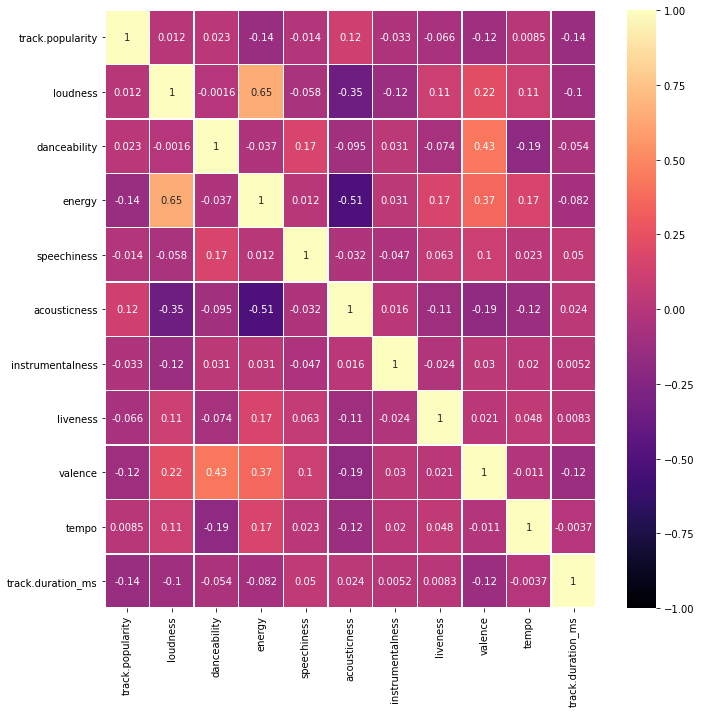

In [ ]:
variables_num.corr()
plt.figure(figsize=(11,11))
ax = sns.heatmap(variables_num.corr(), vmin=-1, vmax=1, annot=True, cmap="magma", linewidths=.5);

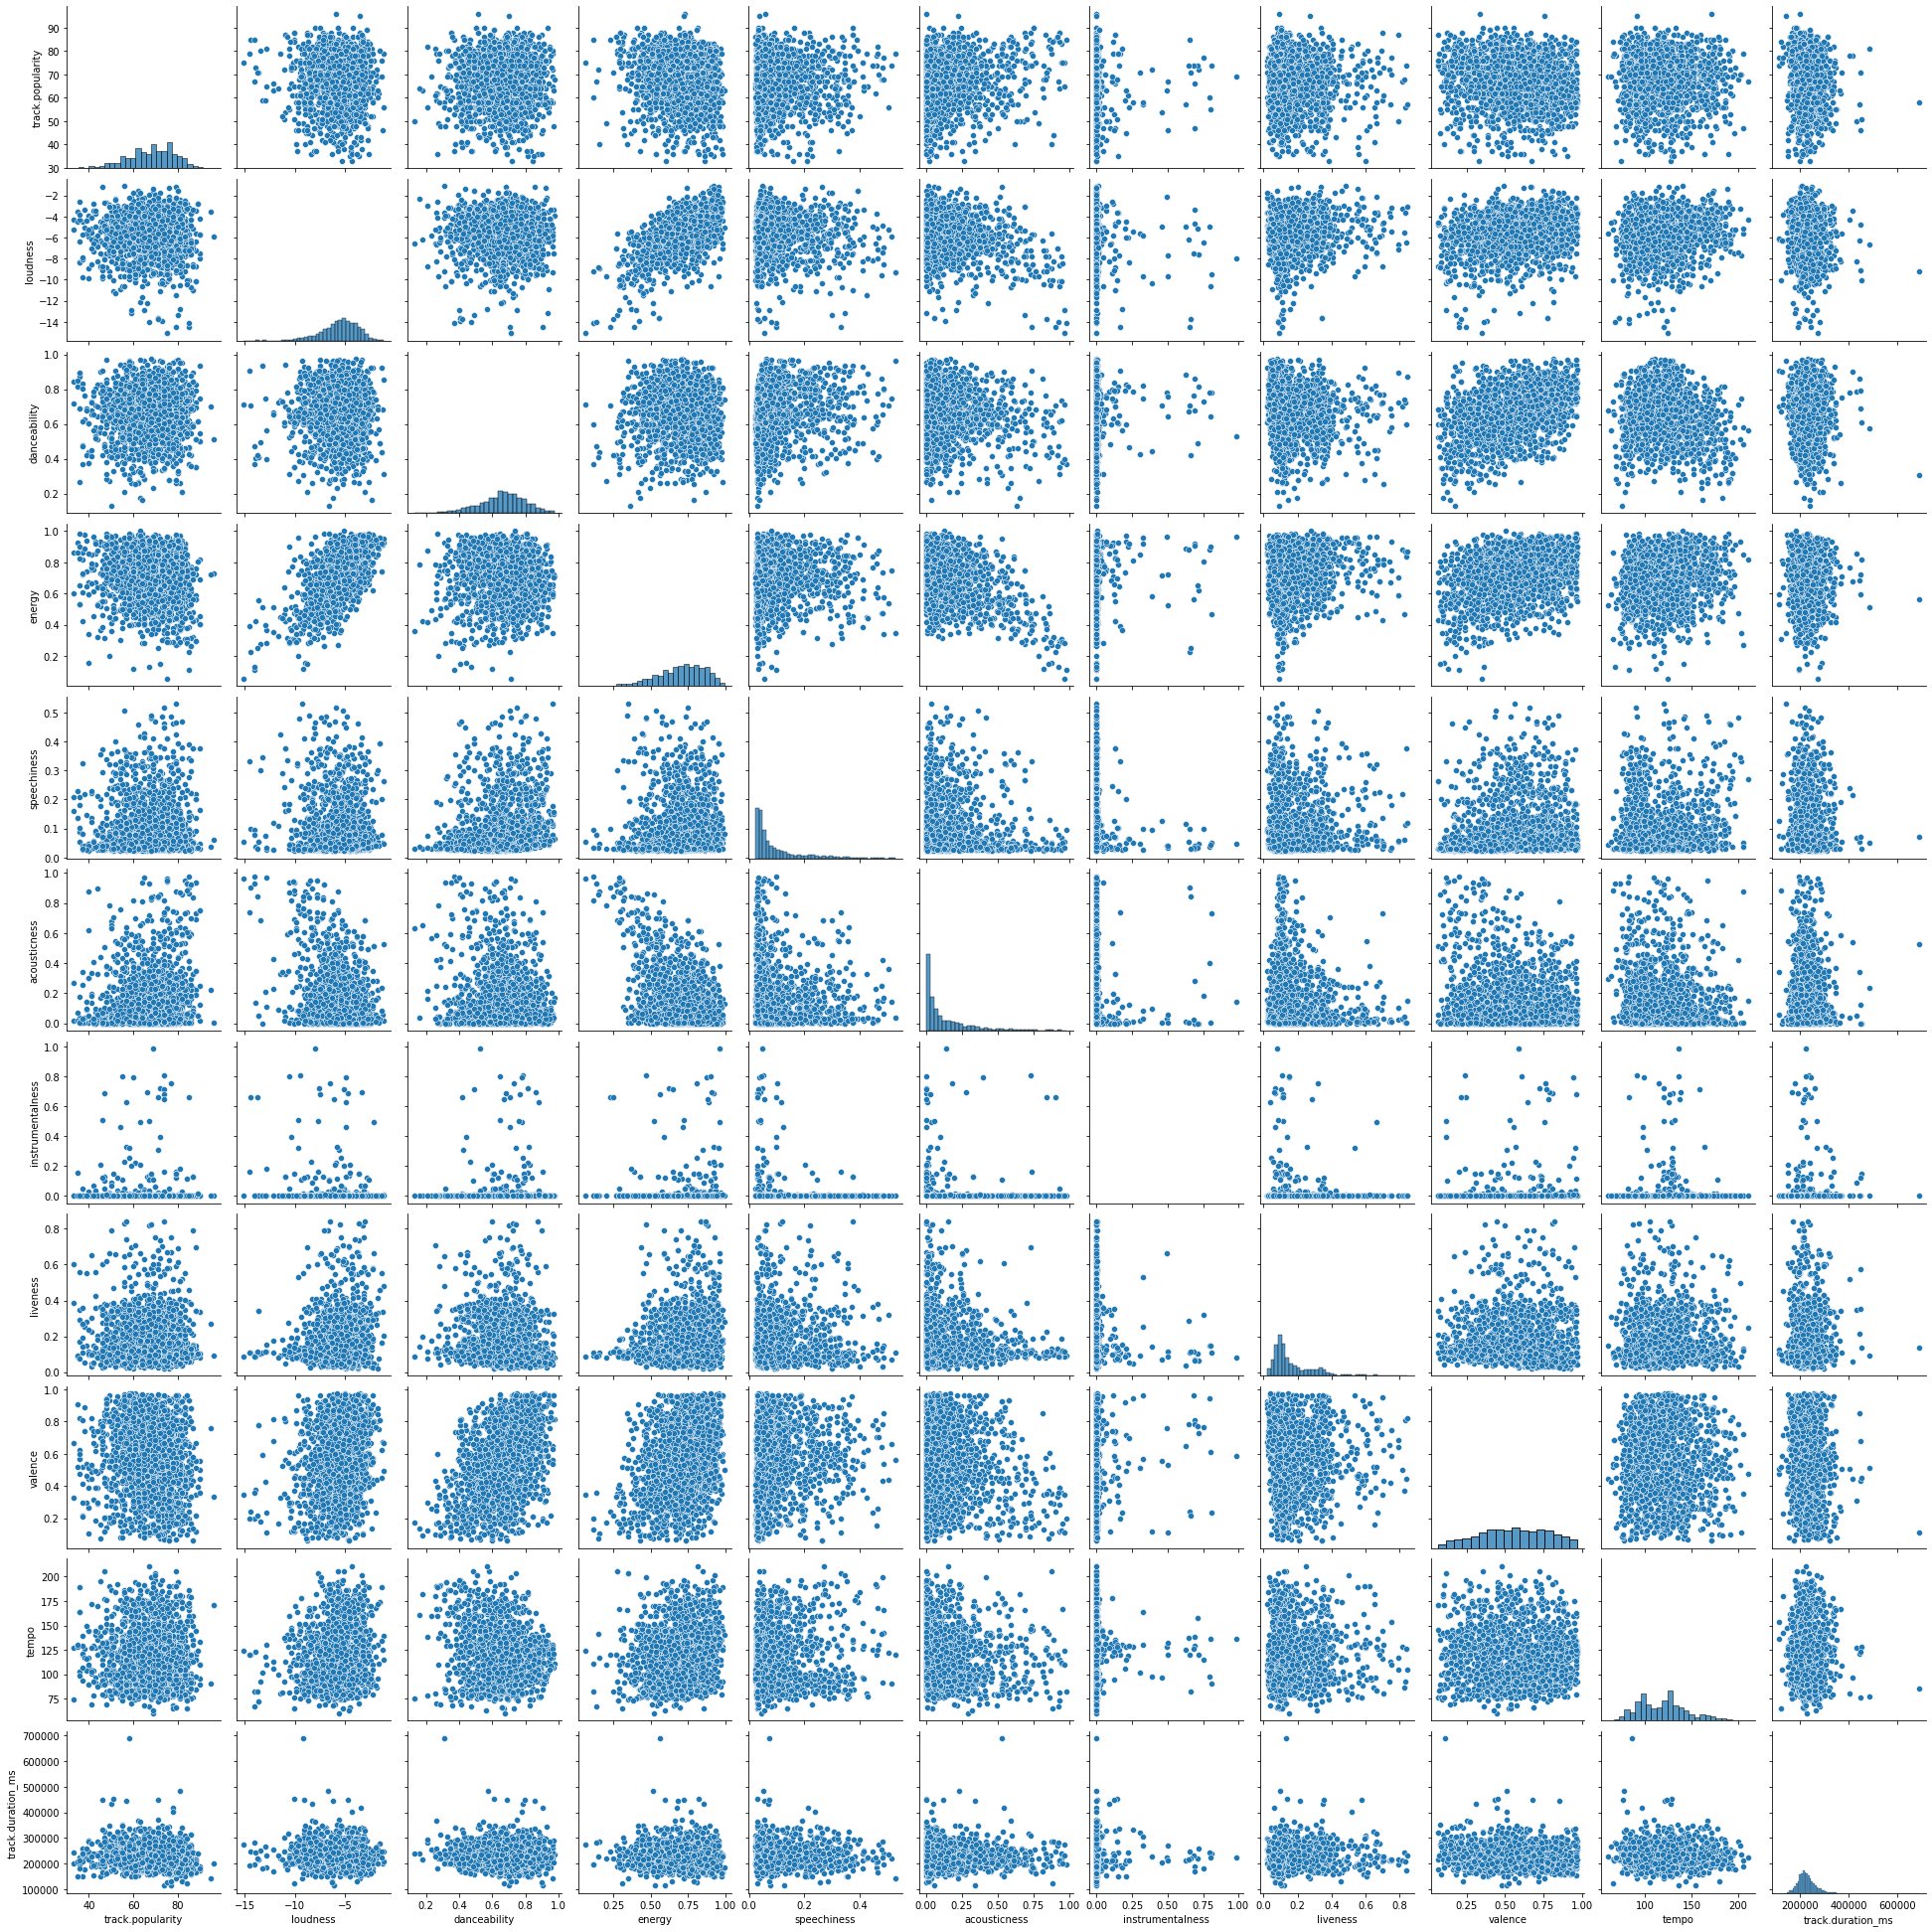

In [ ]:
sns.pairplot(variables_num, palette='husl')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


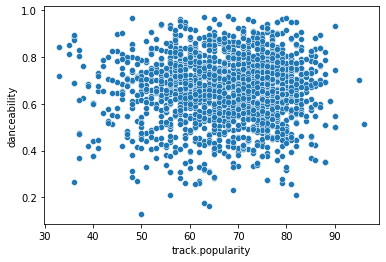

In [ ]:
sns.scatterplot(variables_num['track.popularity'], variables_num['danceability'], palette= 'husl')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
X = variables_num[["loudness",'danceability', 'energy','speechiness','acousticness','instrumentalness','liveness','valence','tempo','track.duration_ms']]
y = variables_num['track.popularity']
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.coef_)

[ 9.00953934e-01  5.73711719e+00 -1.13775953e+01  1.03666444e+00
  4.48627870e+00 -1.23176158e+00 -3.15316491e+00 -6.02672051e+00
  1.72910452e-02 -3.96061648e-05]


In [ ]:
lr.score(X,y)

0.07456821937598535

In [ ]:
!pip install regressors
from sklearn import linear_model
from regressors import stats

In [ ]:
ols = linear_model.LinearRegression()
ols.fit(X, y)

stats.coef_pval(ols, X, y)

array([0.00000000e+00, 2.05169215e-13, 1.77492076e-03, 5.80342265e-08,
       6.96224978e-01, 1.33171134e-03, 7.15575427e-01, 8.01870691e-02,
       5.00901266e-07, 1.33408967e-02, 0.00000000e+00])

In [ ]:
xlabels= ["loudness",'danceability', 'energy','speechiness','acousticness','instrumentalness','liveness','valence','tempo','track.duration_ms']
stats.summary(ols, X, y, xlabels)

Residuals:
     Min       1Q   Median       3Q      Max
 49.8816  65.9974  67.7198  69.5866  79.8844


Coefficients:
                    Estimate  Std. Error  t value   p value
_intercept         87.203341    3.034653  28.7359  0.000000
loudness            0.900954    0.121772   7.3987  0.000000
danceability        5.737117    1.832981   3.1299  0.001775
energy            -11.377595    2.088981  -5.4465  0.000000
speechiness         1.036664    2.654844   0.3905  0.696225
acousticness        4.486279    1.395934   3.2138  0.001332
instrumentalness   -1.231762    3.379944  -0.3644  0.715575
liveness           -3.153165    1.801259  -1.7505  0.080187
valence            -6.026721    1.194988  -5.0433  0.000001
tempo               0.017291    0.006981   2.4769  0.013341
track.duration_ms  -0.000040    0.000001 -39.2124  0.000000
---
R-squared:  0.07457,    Adjusted R-squared:  0.06969
F-statistic: 15.28 on 10 features


In [ ]:
lr.fit(variables_num['track.popularity'].to_frame(), variables_num['acousticness'])
y_predict = lr.predict(variables_num['track.popularity'].to_frame())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


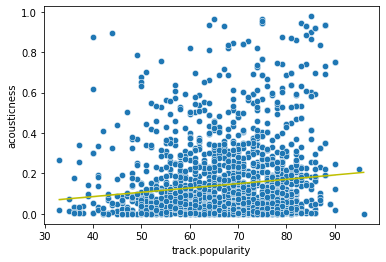

In [ ]:
sns.scatterplot(variables_num['track.popularity'], variables_num['acousticness'], s=40);
sns.lineplot(variables_num['track.popularity'], y_predict, color='y');